# Visualizing using graphviz

In [1]:
#%reset
import graphviz
import pickle
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import pydotplus
from six import StringIO 
from IPython.display import Image
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
import os

hfont = {'fontname':'Helvetica'}


# Optimized CDC Classifiers

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_auroc_0.8100_pruned.sav'

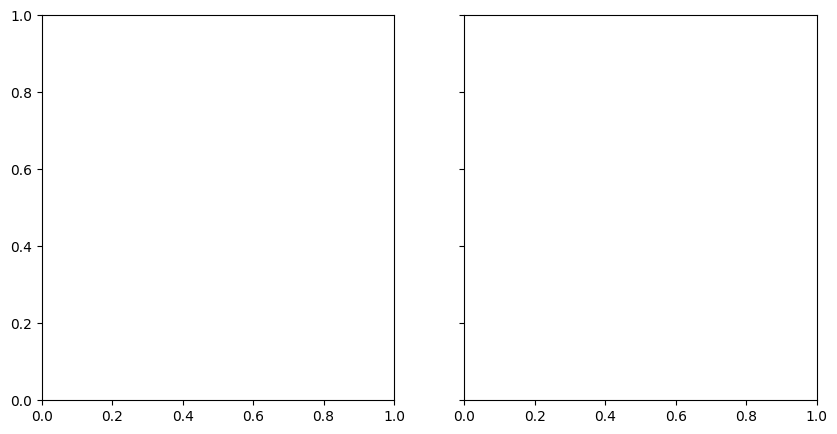

In [2]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
CDC_exact = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_auroc_0.8100_pruned.sav", 'rb'))
CDC_exact_enhanced = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_enhanced_auroc_0.8209_pruned.sav", 'rb'))
feature_names_CDC=['Cases', 'Admits','Percent Covid']
feature_names_enhanced=['Cases', 'Admits','Percent Covid', 'Exceed threshold']

axs.ravel()
auROC = [0.810, 0.821]
plot_tree(CDC_exact, ax=axs[0], feature_names=['Cases', 'Admits','Percent Covid'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
plot_tree(CDC_exact_enhanced, ax=axs[1], feature_names=['Cases', 'Admits','Percent Covid', 'Beds over 15 per 100k'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
#plt.tight_layout()
add_labels_to_subplots(axs, hfont, 0.9, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/4, ax.get_ylim()[1] * -0.300, f'auROC: {auROC[i]}', fontsize=18, **hfont)


In [71]:
# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [CDC_exact, CDC_exact_enhanced]
feature_names_options = [feature_names_CDC,feature_names_enhanced]


for i, clf in enumerate(classifiers):
    dot_data = StringIO()
    export_graphviz(clf, 
                    out_file=dot_data, 
                    class_names=['Over', 'Under'], # the target names.
                    feature_names=feature_names_options[i], # the feature names.
                    filled=True, # Whether to fill in the boxes with colors.
                    rounded=True, # Whether to round the corners of the boxes.
                    special_characters=True, 
                    proportion=False,
                    precision=1, 
                    impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.set_size('"10.5,3.5!"')
    graph.write_png(f'graph_{classifiers.index(clf)}.png')  



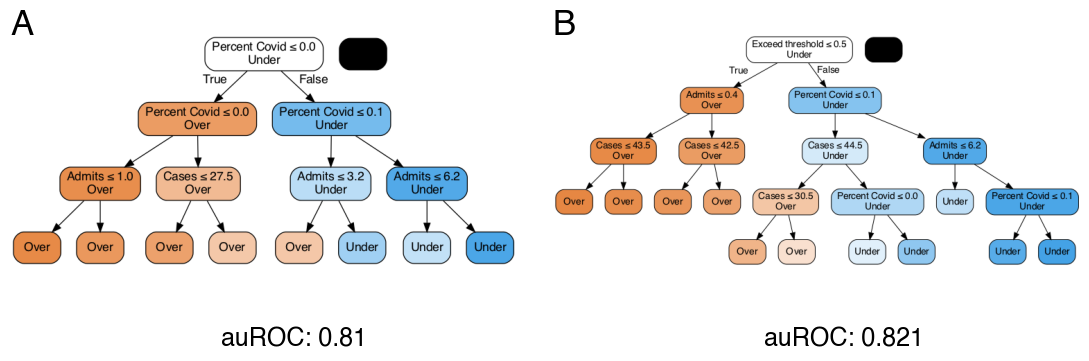

In [74]:
fig, axs = plt.subplots(1,2, figsize=(11, 5.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')

axs.ravel()
for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].axis('off')
add_labels_to_subplots(axs, hfont, 1.1, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/2.5, ax.get_ylim()[1] * -900, f'auROC: {auROC[i]}', fontsize=18, **hfont)
plt.tight_layout()

plot_name = '/Users/rem76/Documents/COVID_projections/COVID_forecasting/Graphs/CDC_classifiers_all.png'
plt.savefig(plot_name, dpi = 500)


# Expanding models - shifted

In [6]:
new_directory = '/Users/rem76/Documents/COVID_projections/Expanding_full_model_shifted/Full_model_shifted_NA/'
os.chdir(new_directory)

In [10]:
Best_model = "/Users/rem76/Documents/COVID_projections/Expanding_full_model_shifted/Full_model_shifted_NA/Full_model_best_shifted.sav"
Worst_model = "/Users/rem76/Documents/COVID_projections/Expanding_full_model_shifted/Full_model_shifted_NA/Full_model_worst_shifted.sav"
clf_full_period_best = pickle.load(open(Best_model, 'rb'))
clf_full_period_worst = pickle.load(open(Worst_model, 'rb'))

In [11]:
def enhance_graph(graph):
    graph.set_dpi(400)  # Set DPI for higher resolution (adjust as needed)
    graph.set_margin(.1)  # Adjust margins to make the graph layout tighter
    graph.set_rankdir('TB')  # Set the direction of the graph (e.g., top to bottom)
feature_names=['Cases','\u0394 Cases', 'Deaths', '\u0394 Deaths', 'Admissions', '\u0394 Admissions', 'ICU', '\u0394 ICU',  'Beds', '\u0394 Beds', 'Percent of beds', '\u0394 Perc. beds', 'Hospital capacity exceeded']

# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [clf_full_period_best,clf_full_period_worst]


for clf in classifiers:
    dot_data = StringIO()
    tree.export_graphviz(clf, 
                         out_file=dot_data, 
                         class_names=['Over', 'Under'], # the target names.
                         feature_names=feature_names, # the feature names.
                         filled=True, # Whether to fill in the boxes with colors.
                         rounded=True, # Whether to round the corners of the boxes.
                         special_characters=True, 
                         proportion=False,
                         precision=0, 
                         impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    # Enhance the graph for better sharpness and layout
    enhance_graph(graph)
    
    # Save or display the enhanced graph as needed
    graph.write_png(f'graph_{classifiers.index(clf)}.png')

ValueError: Length of feature_names, 13 does not match number of features, 9

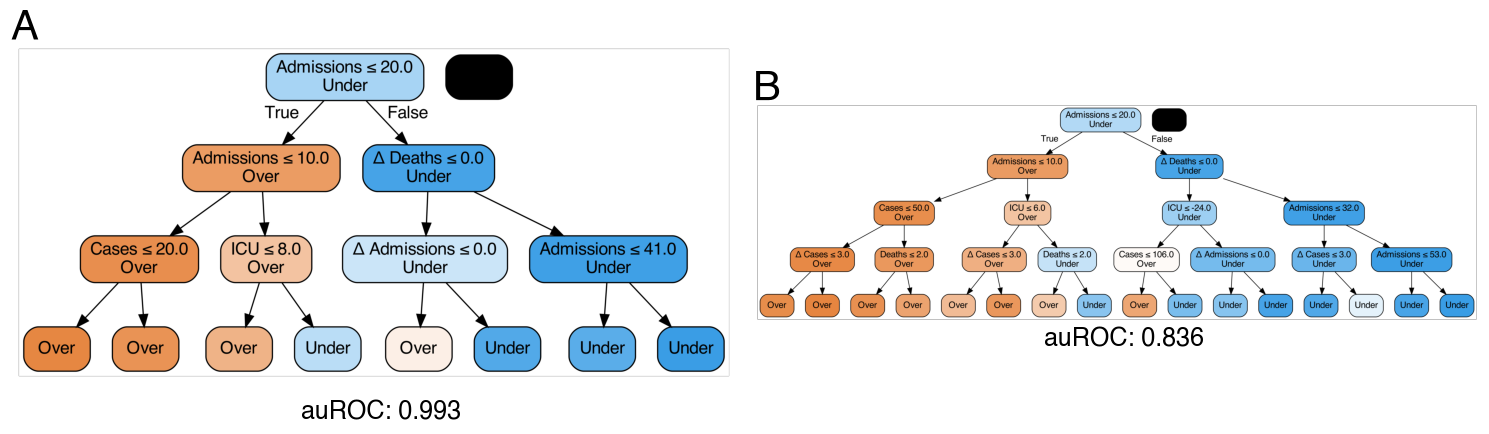

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Create subplots without border
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5), facecolor='white', edgecolor='white', 
                        gridspec_kw={'width_ratios': [1, 1], 'width_ratios': [1, 1]})
auROC = [0.993, 0.836]
axs.ravel()
for ax in axs:
    ax.axis('off')
    ax.set_frame_on(False)  # Remove the border from the subplot

for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].text(axs[i].get_xlim()[1] / 2.5, axs[i].get_ylim()[0] * 1.10, f'auROC: {auROC[i]}', fontsize=18, **hfont)

# Add labels to subplots
add_labels_to_subplots(axs, hfont, 1.1, fontsize=30)

# Adjust gaps between subplots
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plot_name = 'Best_Worst_Classifiers.png'
plt.savefig(plot_name, dpi=200)

# CDC Classifier period

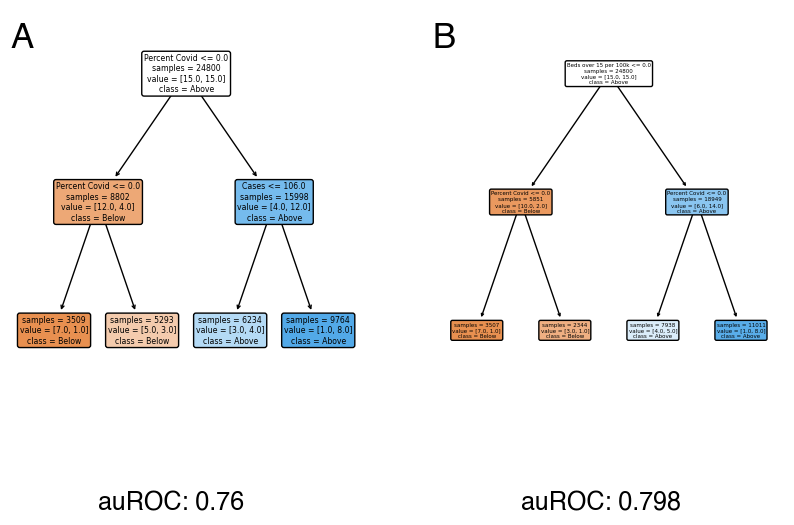

In [23]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
CDC_exact_enhanced = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_classifier_auroc_0.7975_CDC_period_B.sav", 'rb'))
CDC_exact = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_classifier_auroc_0.7603_CDC_period.sav", 'rb'))
feature_names_CDC=['Cases', 'Admits','Percent Covid']
feature_names_enhanced=['Cases', 'Admits','Percent Covid', 'Exceed threshold']

axs.ravel()
auROC = [0.760, 0.798]
plot_tree(CDC_exact, ax=axs[0], feature_names=['Cases', 'Admits','Percent Covid'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
plot_tree(CDC_exact_enhanced, ax=axs[1], feature_names=['Cases', 'Admits','Percent Covid', 'Beds over 15 per 100k'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
#plt.tight_layout()
add_labels_to_subplots(axs, hfont, 0.9, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/4, ax.get_ylim()[1] * -0.300, f'auROC: {auROC[i]}', fontsize=18, **hfont)


In [25]:
new_directory = '/Users/rem76/Documents/COVID_projections/'
os.chdir(new_directory)

In [26]:
# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [CDC_exact, CDC_exact_enhanced]
feature_names_options = [feature_names_CDC,feature_names_enhanced]


for i, clf in enumerate(classifiers):
    dot_data = StringIO()
    export_graphviz(clf, 
                    out_file=dot_data, 
                    class_names=['Over', 'Under'], # the target names.
                    feature_names=feature_names_options[i], # the feature names.
                    filled=True, # Whether to fill in the boxes with colors.
                    rounded=True, # Whether to round the corners of the boxes.
                    special_characters=True, 
                    proportion=False,
                    precision=1, 
                    impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.set_size('"10.5,3.5!"')
    graph.write_png(f'graph_{classifiers.index(clf)}.png')  


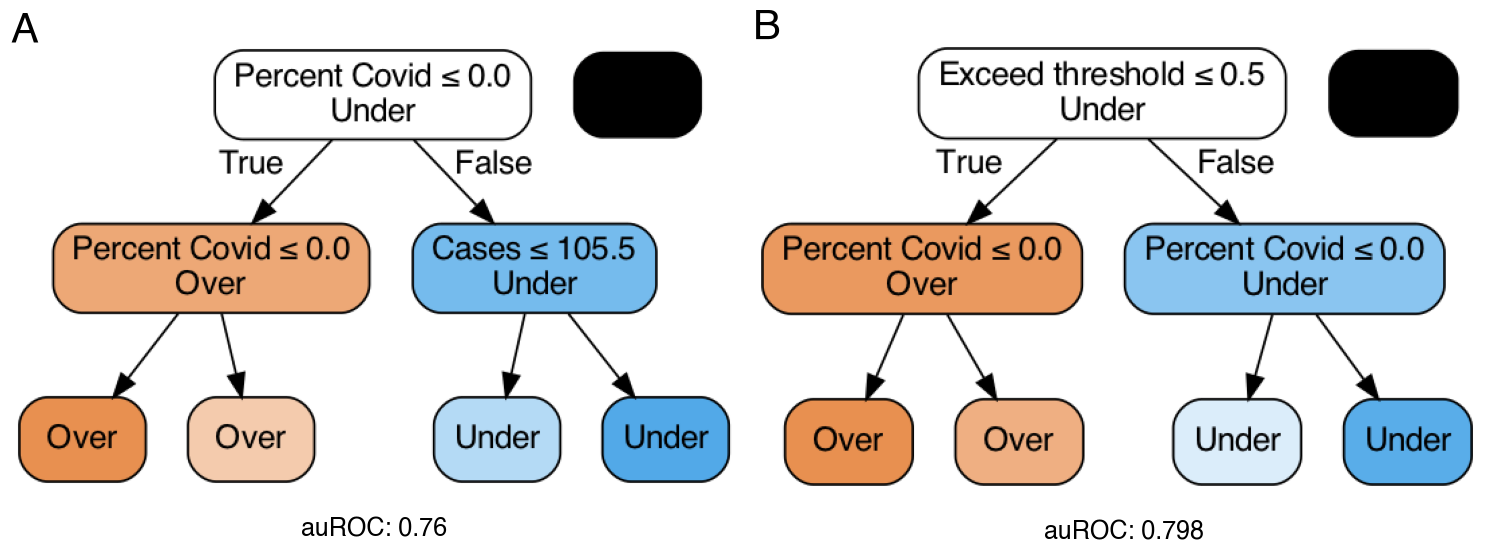

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Create subplots without border
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5), facecolor='white', edgecolor='white', 
                        gridspec_kw={'width_ratios': [1, 1], 'width_ratios': [1, 1]})
auROC = [0.760, 0.798]
axs.ravel()
for ax in axs:
    ax.axis('off')
    ax.set_frame_on(False)  # Remove the border from the subplot

for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].text(axs[i].get_xlim()[1] / 2.5, axs[i].get_ylim()[0] * 1.10, f'auROC: {auROC[i]}', fontsize=18, **hfont)

# Add labels to subplots
add_labels_to_subplots(axs, hfont, 1.1, fontsize=30)

# Adjust gaps between subplots
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plot_name = 'CDC_period_classifier_A_B.png'
plt.savefig(plot_name, dpi=200)